In [15]:
#讀入資料
import pandas as pd
Orignal = pd.read_csv('HW3_bike-sharing.csv')
Orignal

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-1-1 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-1-1 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-1-1 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-1-1 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-1-1 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [16]:
#對datetime進行處理，分成四種資料:year, month, day, clock
year = list()
month = list()
day = list()
clock = list()
for i in range(Orignal.shape[0]):
    temp = Orignal['datetime'][i].split(' ')
    temp[0] = temp[0].split('-')
    temp[1] = temp[1][:2]
    year.append(int(temp[0][0]))
    month.append(int(temp[0][1]))
    day.append(int(temp[0][2]))
    clock.append(int(temp[1]))
Orignal["year"] = year
Orignal["month"] = month
Orignal["day"] = day
Orignal["clock"] = clock
Data = Orignal.drop(['datetime'], axis = 1)

Data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,clock
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


Mean-Squared-Error
Linear model: 20214.493207661297
Ridge  model: 20214.54838753098
Lasso  model: 20243.56583937731


Text(0.5, 1.0, 'scatter of linear reg')

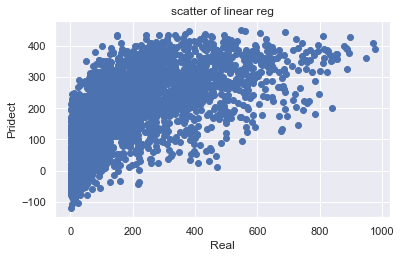

In [17]:
#進行訓練
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

trainData, testData, a, b = train_test_split(Data, range(Data.shape[0]), test_size=0.3, random_state=None)

trainLabel, testLabel = list(trainData['count']), list(testData['count'])
trainData = np.array(trainData.drop(['count'], axis = 1))
testData = np.array(testData.drop(['count'], axis = 1))

#訓練
linearModel = LinearRegression().fit(trainData, trainLabel)
RidgeModel = Ridge().fit(trainData, trainLabel)
LassoModel = Lasso().fit(trainData, trainLabel)
#LogisticModel = LogisticRegression(max_iter = 1000).fit(trainData,trainLabel)

#預測
linearRegResult = linearModel.predict(testData)
RidgeResult = RidgeModel.predict(testData)
LassoResult = LassoModel.predict(testData)
#LogisticResult = LogisticModel.predict(testData)

#測試MSE以判斷準確度
print("Mean-Squared-Error")
print("Linear model:", mean_squared_error(testLabel, linearRegResult))
print("Ridge  model:", mean_squared_error(testLabel, RidgeResult))
print("Lasso  model:", mean_squared_error(testLabel, LassoResult))

#畫圖
%matplotlib inline
plt.xlabel('Real')
plt.ylabel('Pridect')
ax = plt.gca()
ax.set_aspect(1)
plt.scatter(testLabel, linearRegResult)
plt.title('scatter of linear reg')



Text(0.5, 1.0, 'scatter of ridge reg')

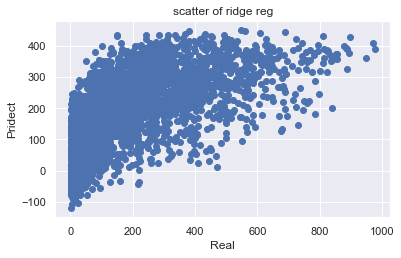

In [18]:
%matplotlib inline
plt.xlabel('Real')
plt.ylabel('Pridect')
ax = plt.gca()
ax.set_aspect(1)
plt.scatter(testLabel, RidgeResult)
plt.title('scatter of ridge reg')



Text(0.5, 1.0, 'scatter of lasso reg')

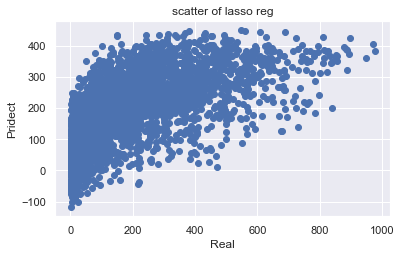

In [19]:
%matplotlib inline
plt.xlabel('Real')
plt.ylabel('Pridect')
ax = plt.gca()
ax.set_aspect(1)
plt.scatter(testLabel, LassoResult)
plt.title('scatter of lasso reg')